## Task #1: Reading in and visualizing data on thermal expansion coefficients of copper

The task is to extract and visualize data from the following web page:

https://www.itl.nist.gov/div898/handbook/datasets/HAHN1.DAT

The data found here shows the response of the coefficient of thermal expansion to temperature for copper, and it was provided by Thomas Hahn from NIST.

The web page provides a link to download this data. I first assumed that this link would send a text file to my downloads folder. However, it instead took me to a .DAT file in my browser. I found it more convinient to copy the URL and use `urllib.request` to create a text file in my directory.

In [1]:
import urllib.request

url = 'https://www.itl.nist.gov/div898/handbook/datasets/HAHN1.DAT'

urllib.request.urlretrieve(url, 'cote_cu.txt')

('cote_cu.txt', <http.client.HTTPMessage at 0x1f8b9d32390>)

Next, I loaded my text file into a NumPy array using `loadtxt`. Upon inspecting the file, I found commands for reading this data file into Dataplot. The first command reads, "SKIP 25." I assumed that this means I can skip the first 25 lines of the file so that I only read in the numerical values. Thus, I set `skiprows=25`.

In [9]:
import numpy as np
data = np.loadtxt('cote_cu.txt', skiprows=25)
data[:5]

array([[24.41 ,  0.591],
       [34.82 ,  1.547],
       [44.09 ,  2.902],
       [45.07 ,  2.894],
       [54.98 ,  4.703]])

By printing out the first five elements of the array, I can confirm that it correctly read the numerical values.

According to the file, the first column contains the thermal expansion coefficients and the second column contains the temperature in Kelvin. Below, I store each column into separate variables.

In [8]:
coef_therm_exp = data[:,0]
temperature = data[:,1]

Next, the goal is to plot the coefficient of thermal expansion vs. temperature and compare with the figure in the following page:

https://www.itl.nist.gov/div898/handbook/pmd/section6/pmd643.htm

Text(0.5, 1.0, 'Temperature Response of the Thermal Expansion of Copper')

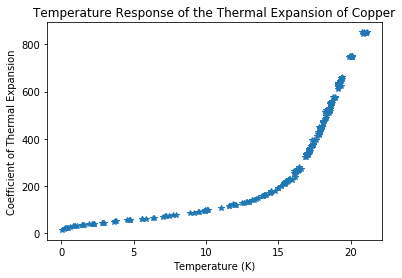

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt 
plt.plot(temperature, coef_therm_exp, '*')
plt.xlabel('Temperature (K)')
plt.ylabel('Coefficient of Thermal Expansion') #units not specified
plt.title('Temperature Response of the Thermal Expansion of Copper')

It's immediately apparent that this figure does not match the figure. The temperature range is lower and more narrow, while the range of coefficients is higher and more broad. It appears that the data was mislabelled in the data file. The numerical values in the column labelled "Coefficient of Thermal Expansion" belong to the column labelled "Temperature." Let's redfine our columns and replot.

Text(0.5, 1.0, 'Temperature Response of the Thermal Expansion of Copper')

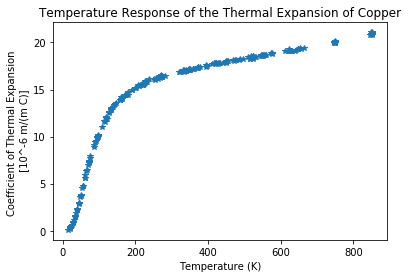

In [18]:
new_coef_therm_exp = data[:,1]
new_temperature = data[:,0]

plt.plot(new_temperature, new_coef_therm_exp, '*')
plt.xlabel('Temperature (K)')
plt.ylabel('Coefficient of Thermal Expansion \n [10^-6 m/(m C)]')
plt.title('Temperature Response of the Thermal Expansion of Copper')

Now this looks exactly like the figure in the web page. I was also curious if units should be specified for the thermal expansion coefficient. I found [here](https://www.engineeringtoolbox.com/thermal-expansion-metals-d_859.html) that in the range of 20 - 300 degrees C (293 - 573 K), the thermal expansion coefficient for copper is approximately 17.6 (10^-6 m/(m C)). This seems like a reasonable average value of the data plotted. Thus, I added these units.

## Task #2: Read chemical symbols and xyz coordinates of an isobutane molecule from a .xyz file

The task is to read in data from the following link:

https://raw.githubusercontent.com/jkitchin/dft-book/master/molecules/isobutane.xyz

The data is written to a text file using `urllib.request` below.

In [19]:
import urllib.request

url = 'https://raw.githubusercontent.com/jkitchin/dft-book/master/molecules/isobutane.xyz'

urllib.request.urlretrieve(url, 'isobutane.txt')

('isobutane.txt', <http.client.HTTPMessage at 0x1f8bbe40198>)

Next the file is loaded with `loadtxt`. By inspecting the file, the first two lines can be skipped, so `skiprows=2` is set. I'm also assuming that the first line tells us how many atoms are listed in the file. This file contains coordinates to 14 atoms.

Loading this file is more tricky, however, because the first column contains strings, while the remaining three contain floats. Setting a `dtype` dictionary will let the array containing multiple data types.

In [69]:
import numpy as np
data = np.loadtxt('isobutane.txt',skiprows=2,
                 dtype={'names': ('symbol','x','y','z'),
                       'formats': ('U2','f4','f4','f4')})

The first column, `symbol`, is set with `U2` because we are reading in chemical symbols (strings) that can be up to two characters long. The remaining columns (`x`,`y`,`z`) are set to contain 32-bit floats (`f4`).

`data` is printed below to confirm everything was loaded correctly.

In [70]:
data

array([('C',  0.      ,  0.      ,  0.376949),
       ('H',  0.      ,  0.      ,  1.475269),
       ('C',  0.      ,  1.45029 , -0.096234),
       ('H',  0.      ,  1.493997, -1.190847),
       ('H', -0.885482,  1.984695,  0.261297),
       ('H',  0.885482,  1.984695,  0.261297),
       ('C',  1.255988, -0.725145, -0.096234),
       ('H',  1.293839, -0.746998, -1.190847),
       ('H',  2.161537, -0.225498,  0.261297),
       ('H',  1.276055, -1.759198,  0.261297),
       ('C', -1.255988, -0.725145, -0.096234),
       ('H', -1.293839, -0.746998, -1.190847),
       ('H', -1.276055, -1.759198,  0.261297),
       ('H', -2.161537, -0.225498,  0.261297)],
      dtype=[('symbol', '<U2'), ('x', '<f4'), ('y', '<f4'), ('z', '<f4')])

The chemical symbols are stored in an array called `symbols`. We can do this by calling the column we want by name.

In [71]:
symbols = data['symbol']
symbols

array(['C', 'H', 'C', 'H', 'H', 'H', 'C', 'H', 'H', 'H', 'C', 'H', 'H',
       'H'], dtype='<U2')

Above and below, we can confirm that `symbols` is a 1D array of strings.

In [66]:
symbols.shape

(14,)

Next, we create a 2D array called `coords` that contains the x, y, and z coordinates of each atom. In the first line of the below cell, the remaining columns in `data` are stored in a NumPy array. However, the array contains three rows, one for each dimension, and each of these rows contain every value that belongs to the corresponding dimension. We want each row to pertain to the *coordinates of an atom*. We can do this by transposing the array.

In [77]:
coords = np.array([data['x'],data['y'],data['z']])
coords = coords.T
coords

array([[ 0.      ,  0.      ,  0.376949],
       [ 0.      ,  0.      ,  1.475269],
       [ 0.      ,  1.45029 , -0.096234],
       [ 0.      ,  1.493997, -1.190847],
       [-0.885482,  1.984695,  0.261297],
       [ 0.885482,  1.984695,  0.261297],
       [ 1.255988, -0.725145, -0.096234],
       [ 1.293839, -0.746998, -1.190847],
       [ 2.161537, -0.225498,  0.261297],
       [ 1.276055, -1.759198,  0.261297],
       [-1.255988, -0.725145, -0.096234],
       [-1.293839, -0.746998, -1.190847],
       [-1.276055, -1.759198,  0.261297],
       [-2.161537, -0.225498,  0.261297]], dtype=float32)

In [78]:
coords.shape

(14, 3)

We can see with the array and the shape, printed above, that we have a 2D array where each row contains the coordinate of an atom.